In [108]:
#Kuka voittaa 2024 EM-jalkapallon kisat? Mieleen tulee ensimmäisenä varmasti joukkueen aikaisemmat EM-suoritukset
#tai sitten lohkovaiheen suoritukset. Analysoidaan kuitenkin tällä kertaa muuttujaa josta harvemmin puhutaan, mutta joka
#korreloi odotetun menestyksen kanssa.

#Analysoidaan datasettiä 2024 EM-jalkapallokisoista, jossa ovat pelaajan nimi, 
#pelipaikka, ikä, seuraklubi, pituus, markkina-arvo euroissa ja maajoukkue. Otetaan analyysin kohteeksi markkina-arvo sekä
#maajoukkue tällä kertaa.

#Selvitään, että mikä on odotetun sijoituksen ja joukkueen markkina-arvon välinen korrelaatio ja selitysaste 
#käyttämällä yksinkertaista regressiota. Tehdään myös yhden muuttujan regression pohjalta yksinkertainen koneoppimismalli, 
#jolla luodaan ennustuksia ja analysoidaan mallin tarkkuutta. Markkina-arvo saadaan datasetistä ja odotettu sijoittuminen 
#saadaan selville vedonlyöntifirmojen sivuilta.

In [109]:
#Ladataan aineisto ja tarvittavat työkalut sen käsittelemiseen

In [110]:
import pandas as pd
import numpy as np

In [164]:
#Luetaan tiedosto, tiedosto on alunperin csv eli Comma Seperated Values eli kaikki tiedot ovat erotettu vain pilkulla. Mutta
#read_csv saa sen lukemisen jälkeen muutettua sen taulukoksi
data = pd.read_csv('2024EURO.csv', sep=",")

In [165]:
#Tarkastellaan 5 ensimmäistä riviä niin saadaan kuva miltä data näyttää. Data näyttää oudolta kun siinä on '\' merkki, mutta
#se tarkoittaa vain että alla oleva data kuuluisi siihen, mutta tilan säästämiseksi se on korvattu '\' merkillä.
print(data.head(5))

                    Name     Position  Age                 Club  Height  \
0  Marc-André ter Stegen   Goalkeeper   32         FC Barcelona     187   
1           Manuel Neuer   Goalkeeper   38        Bayern Munich     193   
2         Oliver Baumann   Goalkeeper   34  TSG 1899 Hoffenheim     187   
3     Nico Schlotterbeck  Centre-Back   24    Borussia Dortmund     191   
4           Jonathan Tah  Centre-Back   28  Bayer 04 Leverkusen     195   

    Foot  Caps  Goals  MarketValue  Country  
0  right    40      0     28000000  Germany  
1  right   119      0      4000000  Germany  
2  right     0      0      3000000  Germany  
3   left    12      0     40000000  Germany  
4  right    25      0     30000000  Germany  


In [113]:
#Luodaan datasetin pohjalta uusi datasetti, jossa on yksittäisten pelaajien sijaan kokonaisten joukkueiden markkina-arvo.
#Ensin täytyy kuitenkin muuttaa MarketValue numeerisiksi kun nyt se on tekstimuodossa niin siitä ei voi tehdä yhteenlaskuja.

In [169]:
data['MarketValue'] = int(data['MarketValue'])

TypeError: cannot convert the series to <class 'int'>

In [167]:
#Yhdistetään eri maat 'Country' sarakkeen mukaan niin, että kaikki joilla on sama maa sarakkeessa lasketaan yhteen MarketValuen
#suhteen
markkina_arvo = data.groupby('Country')['MarketValue'].sum()
markkina_arvo.name = 'markkina_arvo'

In [160]:
#Katsotaan miltä markkina-arvo muuttuja näyttää
print(markkina_arvo)

Country
Albania            111600000
Austria            235500000
Belgium            584500000
Croatia            327700000
Czech Republic     193900000
Denmark            415500000
England           1515000000
France            1234000000
Georgia            160150000
Germany            851000000
Hungary            164450000
Italy              705500000
Netherlands        845000000
Poland             212400000
Portugal          1054500000
Romania             92125000
Scotland           207400000
Serbia             311800000
Slovakia           156700000
Slovenia           139500000
Spain              965500000
Switzerland        282000000
Turkiye            324100000
Ukraine            379000000
Name: markkina_arvo, dtype: int64


In [161]:
#Nyt on joukkueiden markkina-arvot euroissa selvitetty ja seuraavaksi pitää selvittää niiden odotettu sijoittuminen
#vedonlyöntisivustojen perusteella ja liittää se markkina-arvon vierelle. Käytetään tässä Oddsportal.com, jossa on otettu
#eri vedonlyöntisivustoilta kertoimia ja laskettu niistä keskiarvo. Kirjoitetaan odotetut sijoitukset käsin.

In [162]:
odotetut_sijoitukset = pd.Series({'England': 1, 'France': 2, 'Germany': 3, 'Portugal': 4, 'Spain': 5, 'Netherlands': 6, 'Italy': 7,
                          'Belgium': 8, 'Denmark': 9, 'Switzerland': 10, 'Croatia': 11, 'Turkiye': 12, 'Austria': 13,
                           'Serbia': 14, 'Romania': 15, 'Ukraine': 16, 'Czech Republic': 17, 'Hungary': 18, 'Poland': 19,
                          'Slovenia': 20, 'Scotland': 21, 'Slovakia': 22, 'Georgia': 23, 'Albania': 24})

In [119]:
odotetut_sijoitukset.index.name = 'Country'
odotetut_sijoitukset.name = 'odotetut_sijoitukset'

In [120]:
#Katsotaan miltä odotetut_sijoitukset muuttuja näyttää
print(odotetut_sijoitukset)

Country
England            1
France             2
Germany            3
Portugal           4
Spain              5
Netherlands        6
Italy              7
Belgium            8
Denmark            9
Switzerland       10
Croatia           11
Turkiye           12
Austria           13
Serbia            14
Romania           15
Ukraine           16
Czech Republic    17
Hungary           18
Poland            19
Slovenia          20
Scotland          21
Slovakia          22
Georgia           23
Albania           24
Name: odotetut_sijoitukset, dtype: int64


In [121]:
#Nyt meillä on myös odotetut sijoitukset. 
#Seuraavaksi yhdistetään aikaisemmin kerätyt markkina-arvot ja äsken käsin kirjoitetut odotetut sijoitukset

In [122]:
yhdistetty = pd.concat([markkina_arvo, odotetut_sijoitukset], axis=1)

In [123]:
#Katsotaan miltä yhdistetty muuttuja näyttää
print(yhdistetty)

                markkina_arvo  odotetut_sijoitukset
Country                                            
Albania             111600000                    24
Austria             235500000                    13
Belgium             584500000                     8
Croatia             327700000                    11
Czech Republic      193900000                    17
Denmark             415500000                     9
England            1515000000                     1
France             1234000000                     2
Georgia             160150000                    23
Germany             851000000                     3
Hungary             164450000                    18
Italy               705500000                     7
Netherlands         845000000                     6
Poland              212400000                    19
Portugal           1054500000                     4
Romania              92125000                    15
Scotland            207400000                    21
Serbia      

In [124]:
#Nyt meillä on kaikki tarvittavat tiedot regressiomalliin, mutta markkina-arvo on miellyttävämmän näköinen visualisoituna
#jos se skaalataan 0-1 välille siten, että halvin joukkue on 0 ja kallein 1. Käytetään tähän MinMaxScaler työkalua.

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
yhdistetty['skaalattu_markkina_arvo'] = scaler.fit_transform(yhdistetty[['markkina_arvo']])

In [126]:
#Katsotaan miltä yhdistetty muuttuja näyttää nyt kun siihen on lisätty uusi sarake
print(yhdistetty)

                markkina_arvo  odotetut_sijoitukset  skaalattu_markkina_arvo
Country                                                                     
Albania             111600000                    24                 0.013687
Austria             235500000                    13                 0.100764
Belgium             584500000                     8                 0.346042
Croatia             327700000                    11                 0.165563
Czech Republic      193900000                    17                 0.071528
Denmark             415500000                     9                 0.227269
England            1515000000                     1                 1.000000
France             1234000000                     2                 0.802513
Georgia             160150000                    23                 0.047808
Germany             851000000                     3                 0.533339
Hungary             164450000                    18                 0.050830

In [127]:
#Nyt on skaalattu markkina-arvo ja voidaan sijoittaa arvot yksinkertaiseen regressiomalliin. Sitä ennen kuitenkin voitaisiin
#visualisoida datapisteet niin että x on odotettu sijoitus ja y skaalattu markkina-arvo, jotta ne ovat intuiviisemmin nähtävillä. 
#Käytetään siihen matplotlib.

In [128]:
import matplotlib.pyplot as plt

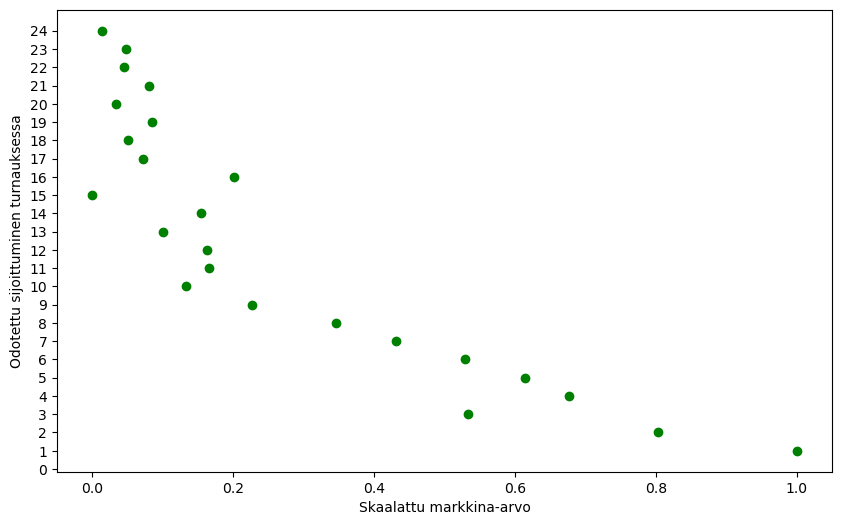

In [129]:
#Annetaan kaavion koko
plt.figure(figsize=(10,6))
#Luodaan pistekaavio jossa, X on skaalattu markkina-arvo ja y odotetut sijoitukset
plt.scatter(yhdistetty['skaalattu_markkina_arvo'], yhdistetty['odotetut_sijoitukset'], color='green')
plt.xlabel('Skaalattu markkina-arvo')
plt.ylabel('Odotettu sijoittuminen turnauksessa')
#Annetaan komento, että Y-akselin arvot menevät 0-24 välillä yksi askel kerrallaan. Python ei käy viimeistä arvoa läpi. 
plt.yticks(range(0, 25, 1))
#Katsotaan miltä näyttää
plt.show()

In [130]:
#Tässä nähdään visualisoituna tulos siitä, että markkina-arvon kasvaessa odotettu sijoittuminen pienenee kuten odotettiin.
#Mielenkiintoinen havainto on, että pienen markkina-arvon omaavan joukkueen pisteet jakautuvat selkeästi sumppuisemmin kun taas
#korkeamman markkina-arvon joukkueiden kohdalla se näyttää olevan selkeästi lineaarisempi. Tämä tarkoittaa, että lineaarinen
#malli ei ole täysin optimaalinen mallintamaan datapisteitä, mutta sitä voidaan silti käyttää suuntaa antavasti, mutta on
#odotettavissa, että mallin tarkkuus ottaa osumaa tuosta sumpusta.

#Luodaan kuitenkin seuraavaksi se koneoppimismalli, jonka avulla voitaisiin laskea odotettu sijoittuminen y kun skaalattu-
#markkina-arvo on x. Tämän jälkeen luodaan vielä uusi visualisointi, jossa on mukana siitä syntyvä suora.

In [131]:
#Luodaan lineaarinen malli ja sijoitetaan siihen x paikalle skaalattu markkina-arvo ja y paikalle odotettu sijoittuminen.

In [132]:
#Haetaan sklearn.linear_model 'kirjastosta' työkalu LinearRegression 
from sklearn.linear_model import LinearRegression

In [172]:
#Tässä on tiedot, jotka syötetään pian malliin, voidaan tulostaa ne niin nähdään miltä ne näyttävät käytännössä
X = np.array(yhdistetty['skaalattu_markkina_arvo'].values).reshape(-1, 1)
y = np.array(yhdistetty['odotetut_sijoitukset'].values)
print(f"Tässä on skaalatut markkina-arvot X: {X}")
print(f"Tässä on odotetut sijoittumisen y: {y}")
malli = LinearRegression()

Tässä on skaalatut markkina-arvot X: [[0.01368708]
 [0.1007643 ]
 [0.34604234]
 [0.16556268]
 [0.07152772]
 [0.22726873]
 [1.        ]
 [0.80251252]
 [0.04780813]
 [0.53333919]
 [0.05083019]
 [0.43108144]
 [0.52912238]
 [0.08452956]
 [0.67635948]
 [0.        ]
 [0.08101555]
 [0.15438812]
 [0.04538347]
 [0.03329526]
 [0.61381007]
 [0.13344461]
 [0.16303259]
 [0.20161645]]
Tässä on odotetut sijoittumisen y: [24 13  8 11 17  9  1  2 23  3 18  7  6 19  4 15 21 14 22 20  5 10 12 16]


In [134]:
#Sijoitetaan X ja y malliin. Tätä vaihetta kutsutaan mallin kouluttamiseksi eli sille annetaan tuo yllä mainittu data ja 
#se luo siitä lineaarisen mallin. Mitä tämä käytännössä tekee niin laskee suoran ja datapisteiden välille MSE eli Mean Squared
#error mikä tarkoittaa, että suora halutaan olevan mahdollisimman lähellä pisteitä eli datapisteestä suoraan matka
#suoralle halutaan olevan mahdollisimman pieni kaikkien pisteiden kohdalla niin suora olisi mahdollisimman tarkka ja kuvaisi 
#pisteitä mahdollisimman hyvin.

In [135]:
malli.fit(X,y)

LinearRegression()

In [136]:
#Selvitetään nyt minkä malli sai kulmakertoimeksi ja vakiotermiksi

In [137]:
kulmakerroin = malli.coef_
vakiotermi = malli.intercept_

In [138]:
#Katsotaan miltä muuttujat näyttävät. Kulmakerroin tulee jostain syystä [] sisällä, mutta sen voi jättää huomioimatta.
print(f"Kulmakerroin on: {kulmakerroin}")
print(f"Vakiotermi on: {vakiotermi}")
print(f"Eli lineaarisen mallin kaava on: {kulmakerroin}x + {vakiotermi}")

Kulmakerroin on: [-22.10828016]
Vakiotermi on: 18.49357488622714
Eli lineaarisen mallin kaava on: [-22.10828016]x + 18.49357488622714


In [139]:
#Tehdään nyt ennuste y:n arvoista tiedetyillä x:n eli skaalatun markkina-arvon tiedoilla mallin avulla, joita käytetään 
#myöhemmin piirrettäessä suoraa.
y_ennuste = malli.predict(X)

In [140]:
#Nyt kun meillä on suora tiedossa niin tehdään sama visualisointi kun aikaisemmin ja laitetaan siihen päälle malli ja katsotaan
#miten malli istuu siihen. Aloitetaan kopioimalla aikasempi visualisointi ja lisätään siihen sitten suora.

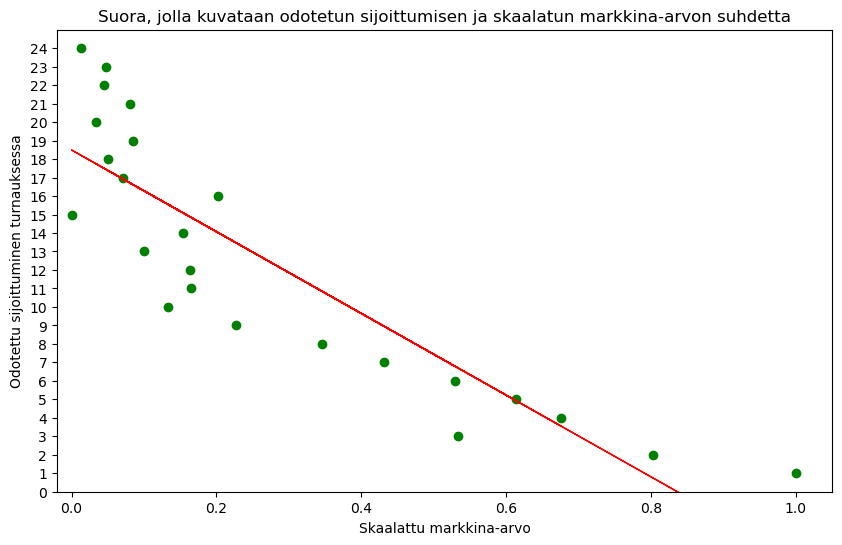

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(yhdistetty['skaalattu_markkina_arvo'], yhdistetty['odotetut_sijoitukset'], color='green')
plt.xlabel('Skaalattu markkina-arvo')
plt.ylabel('Odotettu sijoittuminen turnauksessa')
plt.yticks(range(0, 25, 1))
plt.ylim(0,25)
plt.xlim(-0.02, 1.05)
plt.title('Suora, jolla kuvataan odotetun sijoittumisen ja skaalatun markkina-arvon suhdetta')
plt.plot(X, y_ennuste, linewidth=1, color='red')
plt.show()

In [142]:
#Huomataan heti odotetusti, että vasemman yläkulman sumppu saa aikaan sen, että suora ei istu niin hyvin keski ja korkean 
#markkina-arvon joukkueisiin. Jos haluaisi tehdä vielä tarkempaa analyysia, kannattaisi jakaa keski ja korkean markkina-arvon 
#joukkueet erilleen matalan markkina-arvon joukkueista, jotka aiheuttavat sumppua. Tästä huolimatta malli pystyy kuvaamaan 
#suuntaa antavasti ja mallilla voi tehdä jokseenkin perusteltuja ennustuksia odotetusta sijoittumisesta.

In [143]:
#Mallista on nähtävissä silmillä, että se kuvaa suhdetta kelvollisesti, mutta tehdään vielä laskelma, että kuinka hyvin se
#tarkalleen kuvaa kahden muuttujan suhdetta. Täytyy laskea, että kuinka tarkasti ennustetut y:n arvot kuvaa todellisia y:n
#arvoja. Käytetään tähän taas sklearn "kirjastoa"

In [144]:
#Tarkastellaan kuitenkin ennen laskemista myös silmämääräisesti, että nähdään miltä muuttujat näyttävät. Tehdään taulukko, jossa 
#on mallin tekemät ennusteet ja oikeat odotetut sijoitukset

In [145]:
y_oikeat = np.array(yhdistetty['odotetut_sijoitukset'].values)
y_mallin_tekemat = malli.predict(X)

#Luodaan taulukko
data = pd.DataFrame({'mallin_tekemat_veikkaukset': y_mallin_tekemat, 'oikeat_odotetut_sijoitukset': y_oikeat})
#Mallin ennustukset ovat desimaalilukuja ja negatiivisia lukuja, joten ne täytyy pyöristää kokonaisluvuiksi ja negatiiviset
#muuttaa 1 np.maximun metodin avulla.
data['mallin_tekemat_veikkaukset'] = np.maximum(data['mallin_tekemat_veikkaukset'], 1).round().astype(int)

In [146]:
#Katsotaan miltä silmämääräisesti näyttää veikkaukset verrattuna oikeisiin sijoituksiin
print(data)

    mallin_tekemat_veikkaukset  oikeat_odotetut_sijoitukset
0                           18                           24
1                           16                           13
2                           11                            8
3                           15                           11
4                           17                           17
5                           13                            9
6                            1                            1
7                            1                            2
8                           17                           23
9                            7                            3
10                          17                           18
11                           9                            7
12                           7                            6
13                          17                           19
14                           4                            4
15                          18          

In [147]:
#Nähdään, että lineaarisen mallin veikkaukset näyttävät jokseenkin järkeviltä lukuunottamatta, että joitain sijoituksia on 
#moneen kertaan. #Lasketaan sitten mallin tarkkuus hyödyntämällä sklearn.metrics "kirjastoa" ja sieltä accuracy_score työkalua.

In [148]:
from sklearn.metrics import accuracy_score
#Ensin täytyy taas muutta mallin ennustamat desimaaliluvut kokonaisluvuiksi ja muuttaa negatiiviset 1.
y_mallin_tekemat_muutettu = np.maximum(y_mallin_tekemat, 1).round().astype(int)

#Lasketaan tarkkuus
tarkkuus = accuracy_score(y_oikeat, y_mallin_tekemat_muutettu)

In [149]:
#Tarkastellaan tarkkuutta
print(tarkkuus)

0.16666666666666666


In [150]:
#Mallin tarkkuus ei ole päätä huimaava, mutta se on parempi kuin tyhjä. Tämä on helposti selitettävissä sillä, 
#että suhde ei aikasemmin havaitun sumpun takia ole riittävän lineaarinen, jotta malli voisi tyydyttävämmin 
#mallintaa lineaarisen regression avulla eli vaikka kikkailisi joidenkin muuttujien ja laskutapojen kanssa niin tuskin 
#saataisiin hyvää lopputulosta, koska suhde ei ole riittävän suora lineaariseen mallinnukseen. Toisaalta malli on yhteen
#muuttujaan perustuva malli eli erittäin yksinkertainen, joten siitä näkökulmasta tarkkuus voi olla jopa vakuuttava. Mitä tästä
#voidaan päätellä on kuitenkin se, että jos tekisi monimuuttuja regression niin markkina-arvon kannattaisi olla yksi muuttujista.
#Mallista ei ole suurta hyötyä sellaiselle ihmiselle, joka entuudestaan tuntee jalkapalloa hyvin, mutta ihminen joka ei tiedä
#mitään jalkapallosta hyötyisi mallista.

In [151]:
#Unohdetaan nyt malli ja lasketaan alkuperäisen datan eli skaalatun markkina-arvon ja odotettujen sijoitusten lineaariregression
#Pearson-korrelaatio r ja selitysaste r^2. Käytetään tähän "scipy.stats" kirjastosta
#työkalua linregress.

In [152]:
from scipy.stats import linregress
X = np.array(yhdistetty['skaalattu_markkina_arvo'].values).reshape(-1, 1)
y = np.array(yhdistetty['odotetut_sijoitukset'].values)


_, _, r_korrelaatio, _, _ = linregress(X.flatten(),y)

In [153]:
#Tarkistetaan minkälaisia arvoja saatiin
print(f"Korrelaatio: {r_korrelaatio}")
print(f"Selitysaste: {r_korrelaatio ** 2}")

Korrelaatio: -0.876968650075847
Selitysaste: 0.7690740132158534


In [154]:
#Huomataan, että markkina-arvolla ja odotetulla sijoittumisella turnauksella on määritelmän mukaisesti vahva negatiivinen 
#korrelaatio. Selitysasteessa huomaa vasemman yläkulman sumpun jälleen, jonka vuoksi lineaarinen malli menettää tehoa.
#Selitysaste kertoo kuinka hyvin lineaarinen malli soveltuu datapisteisiin ja korrelaatio suunnanmuutoksen.

In [155]:
#Yhden muuttujan eli joukkueen markkina-arvon vaikutus odotettuun menestykseen turnauksessa on nyt analysoitu ja lopuksi
#voitaisiin yhdistää kaikki saatu tieto yhteen nähtäville.

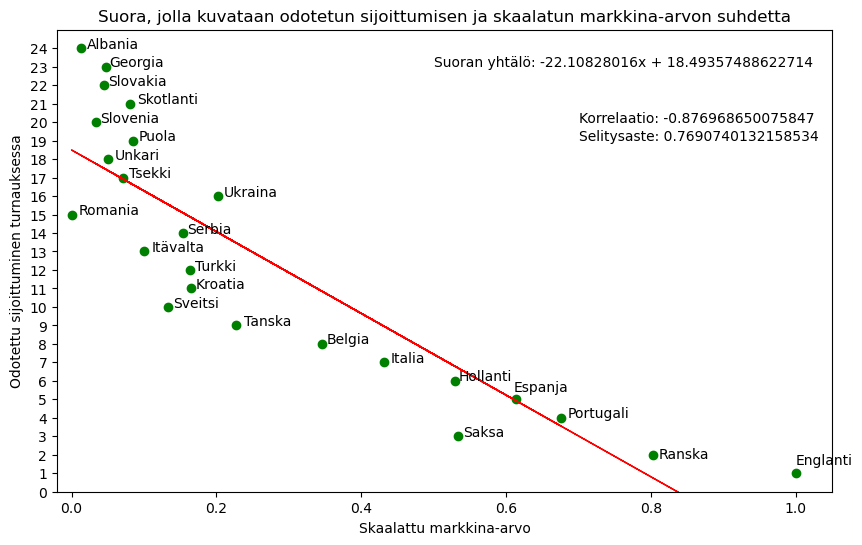

In [180]:
plt.figure(figsize=(10,6))
plt.scatter(yhdistetty['skaalattu_markkina_arvo'], yhdistetty['odotetut_sijoitukset'], color='green')
plt.xlabel('Skaalattu markkina-arvo')
plt.ylabel('Odotettu sijoittuminen turnauksessa')
plt.yticks(range(0, 25, 1))
plt.ylim(0,25)
plt.xlim(-0.02, 1.05)
plt.title('Suora, jolla kuvataan odotetun sijoittumisen ja skaalatun markkina-arvon suhdetta')
plt.plot(X, y_ennuste, linewidth=1, color='red')
plt.text(1,1.50,'Englanti')
plt.text(0.81, 1.8, 'Ranska')
plt.text(0.54,3, 'Saksa')
plt.text(0.685, 4, 'Portugali')
plt.text(0.61, 5.45, 'Espanja')
plt.text(0.535, 6, 'Hollanti')
plt.text(0.44, 7, 'Italia')
plt.text(0.352, 8, 'Belgia')
plt.text(0.238, 9, 'Tanska')
plt.text(0.14, 10, 'Sveitsi')
plt.text(0.171, 11, 'Kroatia')
plt.text(0.17, 12, 'Turkki')
plt.text(0.11, 13, 'Itävalta')
plt.text(0.16, 14, 'Serbia')
plt.text(0.01, 15, 'Romania')
plt.text(0.21, 16, 'Ukraina')
plt.text(0.08, 17, 'Tsekki')
plt.text(0.06, 18, 'Unkari')
plt.text(0.092, 19, 'Puola')
plt.text(0.04, 20, 'Slovenia')
plt.text(0.09, 21, 'Skotlanti')
plt.text(0.05, 22, 'Slovakia')
plt.text(0.052, 23, 'Georgia')
plt.text(0.021, 24, 'Albania')
plt.text(0.7, 20, 'Korrelaatio: -0.876968650075847')
plt.text(0.7, 19, 'Selitysaste: 0.7690740132158534')
plt.text(0.5, 23, 'Suoran yhtälö: -22.10828016x + 18.49357488622714')

plt.show()

In [157]:
#Analyysi on nyt valmis ja kerrataan vielä mitä tehtiin
# 1. Kerättiin tiedot kahdesta lähteestä EM-kisojen pelaajista sekä vedonlyöntifirmojen odotetuista
#joukkueiden sijoituksista. 2. Muutettiin tiedot haluttuun muotoon, jotta niitä pystyttiin hahmottamaan paremmin ja analysoimaa 
#3.Luotiin ja koulutettiin yksinkertainen koneoppimismalli, lineaariregressio, johon syötettiin tiedot ja tehtiin sen 
#pohjalta ennustuksia. 4. Huomattiin kuten varmasti odotettiinkin, että yhden muuttujan malli ei yksinään tarjoa tarkkaa 
#ennustusta, mutta huomattiin, että se on silti tärkeä muuttuja. 5. Tehtiin kuva mikä kiteyttää lopputuloksen. 

In [ ]:
#Mitä havaintoja analyysistä jäi käteen:
#1. Joukkueen markkina-arvo korreloi vahvasti odotetun sijoittumisen kanssa ja saatiin se kvantifioitua
#2. Jos tekee yhden muuttujan regression niin kannattaa tehdä pelkästään keski ja korkean markkina-arvon joukkueista sillä
#matalan markkina-arvon joukkueilla suhde ei ole lineaarinen kun taas esimerkiksi Tanskasta alkaen suhde on selkeästi lineaarine
#3. Markkina-arvo on järkevä ottaa mukaan jos tekee monimuuttuja regression.
#4. Saksalla on paras odotettu sijoittuminen suhteessa markkina-arvoon. Tämän voidaan arvella johtuvan kotiedusta.
#5. Romanialla on EM-kisojen halvin joukkue kun taas Englannilla kallein.